In [1]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt

In [2]:
class SinusoidalEmbeddings(nn.Module):

    def __init__(self, max_pos:int, embed_dim: int, base: float = 10000.0):
        super().__init__()
        # Returns a tensor with shape (max_pos, 1).
        positions = torch.arange(max_pos).unsqueeze(1).float()

        # Creates a tensor with shape (embed_dim //2,). We just need 
        # half of the dimensions of the input embeddings to compute all
        # of the sinusoidal embeddings frequencies
        dimensions = torch.arange(start = 0, end = embed_dim, step = 2).float()

        # Compute the frequencies vector
        frequencies = torch.exp(dimensions * -(math.log(base) / embed_dim))

        # Initialize the embeddings tensor with shape (max_pos, embed_dim)
        embeddings = torch.zeros(max_pos, embed_dim, requires_grad=False)

        # Apply sin to even indices (0, 2, 4, ...) of the input embeddings
        embeddings[:, 0::2] = torch.sin(positions * frequencies)

        # Apply cos to odd indices (1, 3, 5, ...) of the input embeddings
        embeddings[:, 1::2] = torch.cos(positions * frequencies)

        self.embeddings = embeddings

    def forward(self, x, t):
        embeds = self.embeddings[t].to(x.device)
        return embeds[:, :, None, None]

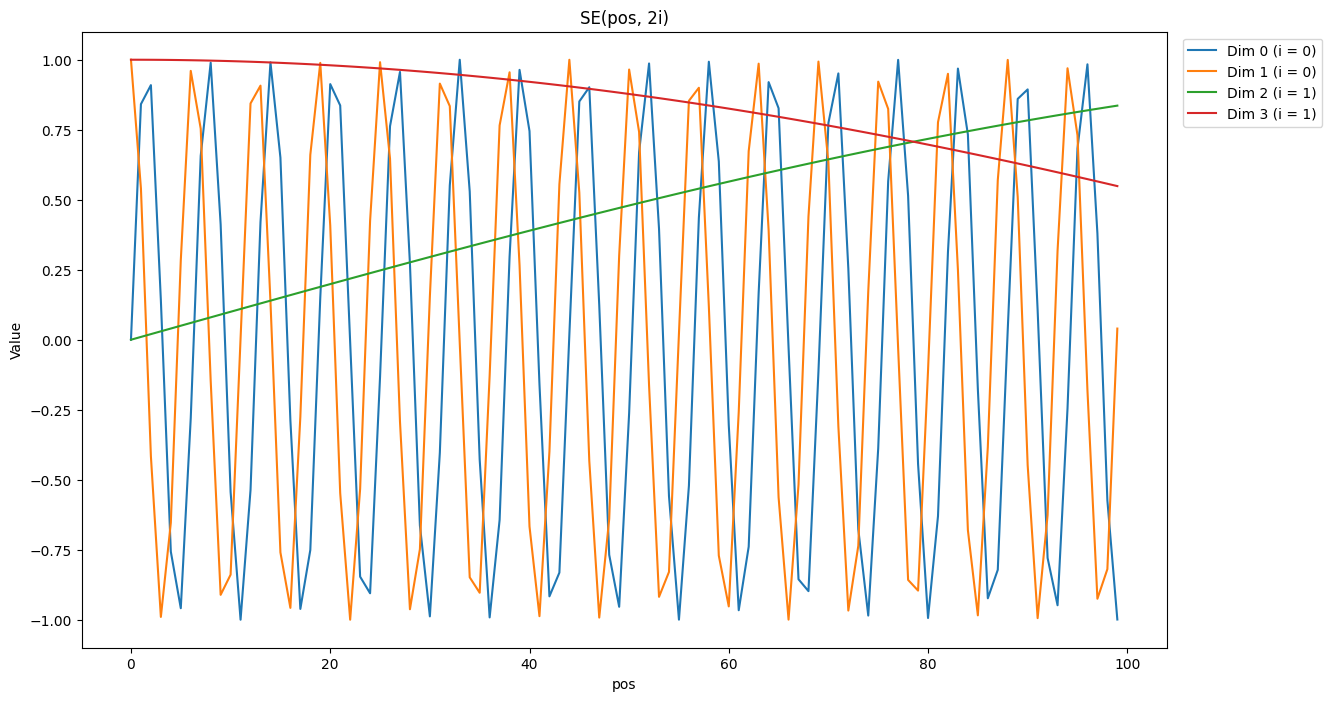

In [3]:

max_pos = 100

# Our embeddings will only have 4 dimension
embed_dim = 4
sinusoidal_embeddings = SinusoidalEmbeddings(max_pos, embed_dim)

# Generate embeddings for a range of time steps
embeddings = sinusoidal_embeddings.embeddings

# Convert embeddings to numpy for plotting
embeddings_np = embeddings.numpy()

# Plot the sunosoidal embeddings for different time steps
plt.figure(figsize=(14, 8))
for i in range(embed_dim):
    plt.plot(embeddings_np[:, i], label=f"Dim {i} (i = {i//2})")
 
plt.title("SE(pos, 2i)")
plt.xlabel("pos")
plt.ylabel("Value")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))

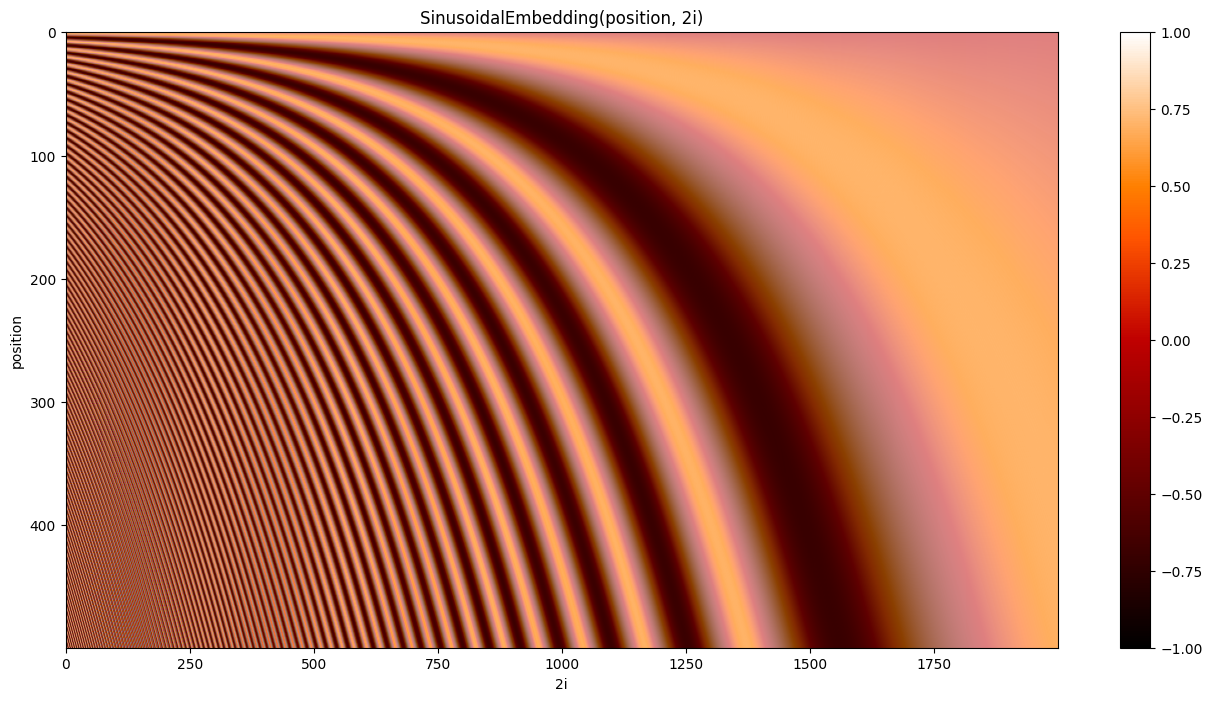

In [4]:
# We'll create embeddings with many dimensions to better see the 
# frequency decay effect
max_pos = 500
embed_dim = 2000
sinusoidal_embeddings = SinusoidalEmbeddings(max_pos, embed_dim, base = 500)


x = torch.zeros(embed_dim)
results = torch.zeros(max_pos, embed_dim)
for pos in range(max_pos):
    results[pos] =  x + sinusoidal_embeddings.embeddings[pos]

tensor_np = results.numpy()
# Plot the heatmap using matplotlib
plt.figure(figsize=(16, 8))
plt.imshow(tensor_np, aspect='auto', cmap='gist_heat')
plt.colorbar(label='')
plt.xlabel('2i')
plt.ylabel('position')
plt.title('SinusoidalEmbedding(position, 2i)')
plt.savefig("sin_embeds_freq_decay")
plt.show()